In [1]:
import warnings
warnings.filterwarnings('ignore')

from Networks import *
from Plotting import *

import sys
sys.path.insert(0, '../')
from Data import *
Data = Loader(0.2)

In [2]:
Reference_Net = Network(Data.input_shape, Data.num_classes, noise=False)
Reference_Net.Net.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________

In [9]:
Reference_Net = Network(Data.input_shape, Data.num_classes, noise=False)
Reference_Net.load(path='Reference')

f = open('records/Reference_Hist.pickle', 'wb')
hist = Reference_Net.hist 
pickle.dump(hist,f)
f.close()

Teacher_Net05 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net05.load(path='Teacher_05')

Teacher_Net10 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net10.load(path='Teacher_10')

Teacher_Net20 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net20.load(path='Teacher_20')

f = open('records/Teacher_Hist.pickle', 'wb')
history = [Teacher_Net05.hist, Teacher_Net10.hist, Teacher_Net20.hist] 
pickle.dump(history,f)
f.close()

In [14]:
Student_Net05 = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net05.load(path='Student_05')

Student_Net05_Noise = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net05_Noise.load(path='Student_05_Noise')

Student_Net10 = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net10.load(path='Student_10')

Student_Net10_Noise = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net10_Noise.load(path='Student_10_Noise')

Student_Net20 = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net20.load(path='Student_20')

Student_Net20_Noise = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net20_Noise.load(path='Student_20_Noise')


f = open('records/Student_Hist.pickle', 'wb')
history = [Student_Net05.hist, Student_Net05_Noise.hist, Student_Net10.hist, Student_Net10_Noise.hist, Student_Net20.hist, Student_Net20_Noise.hist] 
pickle.dump(history,f)
f.close()

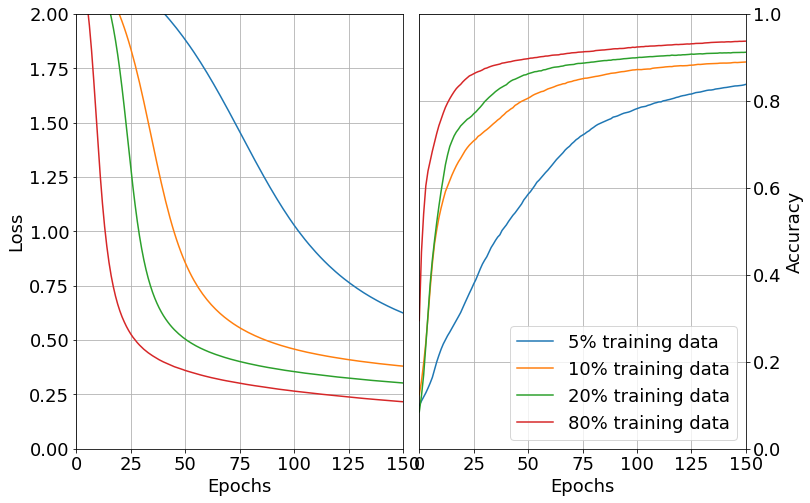

In [11]:
f = open('records/Reference_Hist.pickle', 'rb')
Ref_Hist = pickle.load(f)
f.close()

f = open('records/Teacher_Hist.pickle', 'rb')
Teacher_Hist05, Teacher_Hist10,Teacher_Hist20 = pickle.load(f)
f.close()

to_plot = [Teacher_Hist05, Teacher_Hist10, Teacher_Hist20, Ref_Hist]
labels = ['5% training data', '10% training data', '20% training data', '80% training data']
plot_results(to_plot, labels)

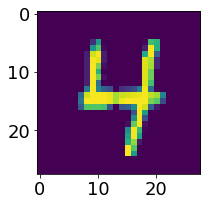

In [19]:
Aug = Augmenter(2)

x,_ = Data.get_test()
fig = plt.figure(figsize=(4,3))
x = np.reshape(x,np.shape(x)[:3])
x1 = x[1]
plt.imshow(x1)


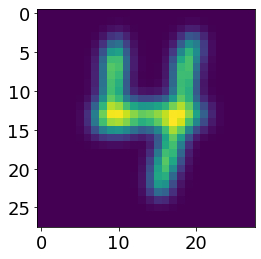

In [22]:
x2 = Aug.transform(x1)
plt.imshow(x2)

In [15]:
f = open('records/Student_Hist.pickle', 'rb')
Student_Hist05, Student_Hist05_Noise, Student_Hist10, Student_Hist10_Noise, Student_Hist20, Student_Hist20_Noise = pickle.load(f)
f.close()

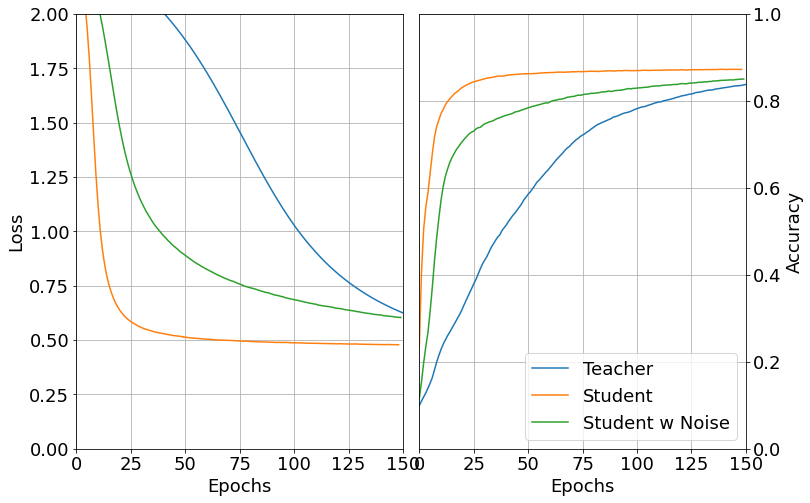

In [16]:
to_plot = [Teacher_Hist05, Student_Hist05, Student_Hist05_Noise]
labels = ['Teacher', 'Student', 'Student w Noise']
plot_results(to_plot, labels)

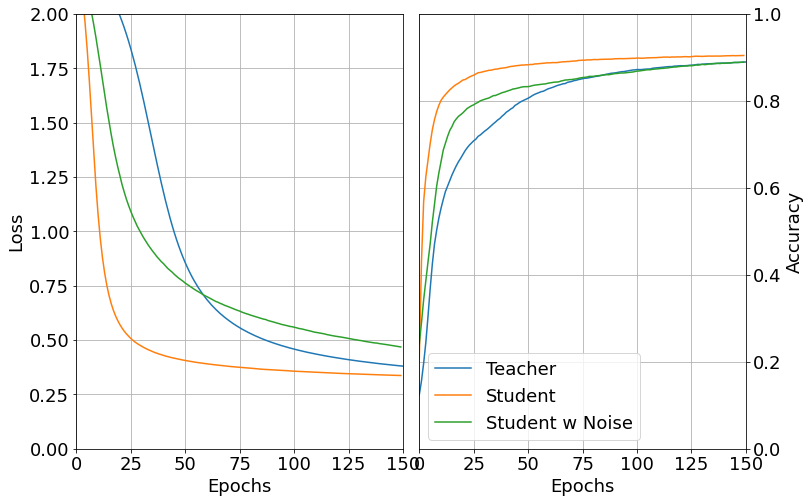

In [17]:
to_plot = [Teacher_Hist10, Student_Hist10, Student_Hist10_Noise]
labels = ['Teacher', 'Student', 'Student w Noise']
plot_results(to_plot, labels)

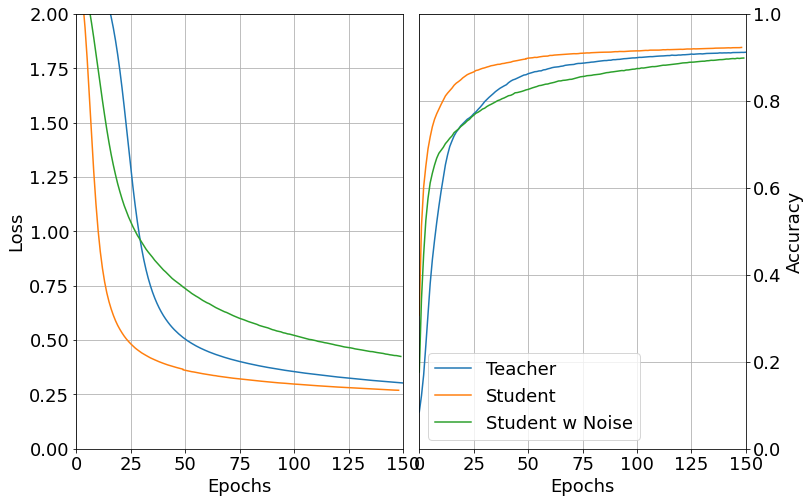

In [18]:
to_plot = [Teacher_Hist20, Student_Hist20, Student_Hist20_Noise]
labels = ['Teacher', 'Student', 'Student w Noise']
plot_results(to_plot, labels)

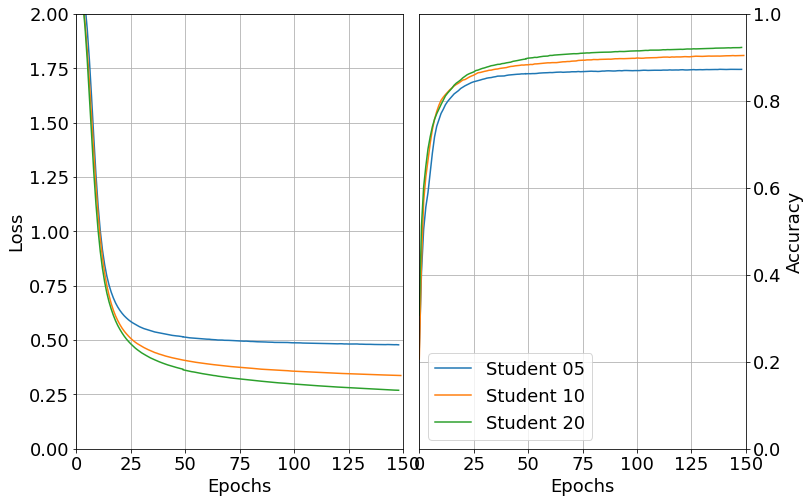

In [36]:
to_plot = [Student_Hist05, Student_Hist10, Student_Hist20]
labels = ['Student 05', 'Student 10', 'Student 20']
plot_results(to_plot, labels)